# CHAPTER 5 - The Simple Recurrent Neural Network

_pg. 67-82_

# PART 1
_pg.70-76_

## Prepare the Sample Data

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

loc = "/home/ubuntu/CSU/Notebooks/big-data-summer-school-2017/COE.csv"
temp = pd.read_csv(loc)
data = temp.drop(temp.columns [[0,1]], axis=1)

y = data["COE$"]

x = data.drop(data.columns[[0,4]], axis=1)
x = x.apply(np.log)
x = pd.concat([x, data["Open?"]], axis=1)

scaler_x = preprocessing.MinMaxScaler(feature_range=(0,1))
x = np.array(x).reshape((len(x), 4))
x = scaler_x.fit_transform(x)

scaler_y = preprocessing.MinMaxScaler(feature_range=(0,1))
y = np.array(y).reshape((len(y), 1))
y = np.log(y)
y = scaler_y.fit_transform(y)

## Follow this Approach to Create Your Train and Test Sets

In [3]:
end = len(x) - 1
learn_end = int(end * 0.954)
x_train = x[0:learn_end - 1, ]
x_test = x[learn_end:end - 1, ]
y_train = y[1:learn_end]
y_test = y[learn_end + 1: end]

x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

In [4]:
print "Shape of x_train is ", x_train.shape

Shape of x_train is  (250, 4, 1)


In [5]:
print "Shape of x_test is ", x_test.shape

Shape of x_test is  (12, 4, 1)


## Import Keras

In [6]:
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN

Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5110)


## Determine Model Structure

In [7]:
seed = 2016
np.random.seed(seed)
fit1 = Sequential()
# UPDATED
fit1.add(SimpleRNN(output_dim=8, activation="tanh", input_shape=(4,1)))
# fit1.add(SimpleRNN(units=8, activation="tanh", input_shape=(4,1)))
# UPDATED
fit1.add(Dense(output_dim=1, activation='linear'))
# fit1.add(Dense(units=1, activation='linear'))

# PART 2
_pg. 79-81_

In [8]:
# uses accelerated gradient descent
sgd = SGD(lr=0.0001, momentum=0.95, nesterov=True)
fit1.compile(loss='mean_squared_error', optimizer=sgd)

## Fitting the Model
The model, with a batch size of 10, is fit over 700 epochs as follows:

In [9]:
%%capture
fit1.fit(x_train, y_train, batch_size=10, nb_epoch=700)

In [10]:
score_train = fit1.evaluate(x_train, y_train, batch_size=10)
score_test = fit1.evaluate(x_test, y_test, batch_size=10)
print "in train MSE = ", round(score_train, 6)
print "in test MSE = ", round(score_test, 6)

10/12 [========================>.....] - ETA: 0s0sin train MSE =  0.003548
in test MSE =  0.000702


In [11]:
pred1 = fit1.predict(x_test)
print pred1

[[ 0.54559129]
 [ 0.52521986]
 [ 0.52223146]
 [ 0.52868652]
 [ 0.55742121]
 [ 0.5719558 ]
 [ 0.59507048]
 [ 0.57978672]
 [ 0.55386668]
 [ 0.54346991]
 [ 0.57266098]
 [ 0.57798773]]


In [12]:
# apply the inverse transformation to predictions
pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1), 1)))
print pred1

[[ 9.44600582]
 [ 9.35115719]
 [ 9.33724308]
 [ 9.36729813]
 [ 9.50108624]
 [ 9.56875801]
 [ 9.6763792 ]
 [ 9.60521793]
 [ 9.48453617]
 [ 9.43612957]
 [ 9.57204151]
 [ 9.59684277]]


In [13]:
# undo the initial log transformation of the data
pred1 = np.exp(pred1)
print np.rint(pred1)

[[ 12658.]
 [ 11512.]
 [ 11353.]
 [ 11699.]
 [ 13374.]
 [ 14311.]
 [ 15937.]
 [ 14842.]
 [ 13155.]
 [ 12533.]
 [ 14358.]
 [ 14718.]]


## Visualize the Data

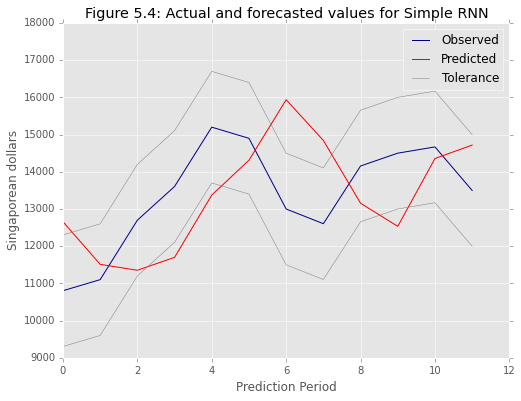

In [14]:
# CREATE FIGURE 5.4
# pg. 81
plt.rcParams['figure.figsize'] = (8,6)

# Original Series
obs_price = data["COE$"][-13:-1]
max_price = (obs_price + 1500).tolist()
min_price = (obs_price - 1500).tolist()
obs_price.tolist()

plt.plot(range(12), obs_price, linestyle='solid', label="Observed", color="darkblue", linewidth='1')

# Predictions
plt.plot(range(12), pred1, linestyle='solid', label="Predicted", color="red", linewidth='1')

# Desired Tolerance
plt.plot(range(12), max_price, linestyle='solid', label="Tolerance", color="grey", linewidth='0.5')
plt.plot(range(12), min_price, linestyle='solid', label=None, color="grey", linewidth='0.5')

# Figure Settings
plt.title("Figure 5.4: Actual and forecasted values for Simple RNN")
plt.xlabel("Prediction Period")
plt.ylabel("Singaporean dollars")
plt.ylim(9000,18000)
plt.legend()
plt.show()